# __EXPLORATORY DATA ANALYSIS ON SPOTIFY BEST SONGS IN 2020__


--------------------------------------------------------------------------------

_Dear Karen,_

> _I am excited to present to you my analysis of the dataset of the top 50 tracks from Spotify that we obtained earlier. In this analysis, I aim to uncover insights into the characteristics of the most popular tracks of the year and identify any underlying trends to answer our questions about the best determinants of a hit song._
>
> _As we have already known, the dataset contains 50 observations and 16 variables, including attributes such as artist name, track name, genre, and popularity score. I will perform a thorough data cleaning process to ensure the accuracy and consistency of the data._
>
>_Once the data is cleaned, I will conduct descriptive statistics to gain a deeper understanding of the distribution and range of the variables. Additionally, we can visualize the data through various charts and graphs to identify patterns and trends._
>
> _By the end of this analysis, I hope to provide valuable insights that can inform future decisions in our upcoming consultation job to the manager of Universal Music. I hope these findings and recommendations can help our team devise a sensible strategy._

_Kind regards,_
<br>_Anton._


In [39]:
# INITIATION --------
# System information
import os

# Data preparation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import skimage as ski
import seaborn as sns

# Data transformation & algorithms
import numpy as np
import scipy as sp


print(
    'CURRENT DIRECTORY:\n'
    '. = \"', os.getcwd(), '\"', sep=''
)

for dirName, _, filenames in os.walk('.'):
    if dirName[2:3] != '.':
        print('\n', dirName, sep='')
        for filename in filenames:
            print(os.path.join(dirName, filename))


CURRENT DIRECTORY:
. = "D:\OneDrive - UvA\Misc\Dang Khoa - Personal\Learn\Data Science\Turing\1 Data Wrangling with Python\S2 project"
.
.\EDA_SpotifyTopTracks.ipynb


.\data
.\data\spotifytoptracks.csv




## Familiarization with the Data

 We will import the dataset and have a first view of the data.


In [77]:
#
DATA = pd.read_csv(
    '.\data\spotifytoptracks.csv',
    index_col='track_id',
    usecols=lambda col: col != 'Unnamed: 0'
)

DATA.columns = (column.capitalize() for column in DATA.columns)
DATA.index.name = 'ID'
DATA.rename(columns={'Track_name': 'Title', 'Duration_ms': 'Duration'}, inplace=True)


In [78]:
#
DATA.head(10)

,Artist,Album,Title,Energy,Danceability,Key,Loudness,Acousticness,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Duration,Genre
ID,,,,,,,,,,,,,,,
0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,After Hours,Blinding Lights,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1rgnBhdG2JDFTbYkYRZAku,Tones And I,Dance Monkey,Dance Monkey,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
0nbXyq5TXYPCO7pr3N8S4I,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
2Wo6QQD1KMDWeFkkjLqwx5,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
3PfIrDoz19wz7qK7tYeu62,Dua Lipa,Future Nostalgia,Don't Start Now,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco
7ytR5pFWmSjzHJIeQkgog4,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.497,89.977,181733,Hip-Hop/Rap
6UelLqGlWMcVH1E5c4H7lY,Harry Styles,Fine Line,Watermelon Sugar,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.557,95.390,174000,Pop
7eJMfftS33KTjuF7lTsMCx,Powfu,death bed (coffee for your head),death bed (coffee for your head),0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.348,144.026,173333,Hip-Hop/Rap
2rRJrJEo19S2J82BDsQ3F7,Trevor Daniel,Nicotine,Falling,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.236,127.087,159382,R&B/Hip-Hop alternative


In [92]:
#
DATA.describe()

,Energy,Danceability,Key,Loudness,Acousticness,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Duration
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


## Data Cleaning


In [91]:
# HANDLING ERRONEOUS VALUES

# Analyze possible invalid data
rows_NaN = DATA.isnull().any(axis=1)

if rows_NaN.any():  # check if any observations have unrepresentable values
    print('Invalid observations:\n', DATA[rows_NaN])

else:
    print('Invalid values not found.')

# Analyze possible missing data
rows_NA = DATA.isna().any(axis=1)

if rows_NA.any():  # check if any observations have missing values
    print('Observations with missing values:\n', DATA[rows_NA])

else:
    print('Missing values not found.')

# Cleaning the dataset
## Observations with erroneous non-numeric data such as artist, album, or title names and genres are removed;
## Due to limited number of observations, invalid numeric data are replaced with the variables' averages
DATA.dropna(subset=('Artist', 'Album', 'Title', 'Genre'), inplace=True)
DATA.fillna(DATA.mean(numeric_only=True, skipna=True), inplace=True)


print('\n# Dataset no longer contains unrepresentable or missing data.')


Invalid values not found.
Missing values not found.

# Dataset no longer contains unrepresentable or missing data.


In [94]:
# REMOVING DUPLICATE SAMPLES & FEATURES

# Remove duplicated IDs
uniqueIDs = DATA.index.unique()

if uniqueIDs.size != DATA.shape[0]:
    duplicatedIDs = DATA.index.duplicated()
    print('Duplicated IDs:', ', '.join(DATA[duplicatedIDs]))
    DATA = DATA[~duplicatedIDs]

# Remove duplicated tracks
uniqueTracks = DATA['Title'].unique()

if uniqueTracks.size != DATA.shape[0]:
    print('Duplicated Tracks:', ', '.join(DATA['Title'].duplicated()))
    DATA.drop_duplicates(subset=('Track'), inplace=True)


print('\n# Dataset no longer contains duplicated observations.')


In [93]:
# TREATING OUTLIERS

#



##


---------------------------------------------------------------------------------


In [21]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


    # Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [22]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# spotifytoptracks.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('D:\OneDrive - UvA\Misc\Dang Khoa - Personal\Learn\Data Science\Turing\\1 Data Wrangling with '
                  'Python\S2 project\data\spotifytoptracks.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'spotifytoptracks.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.head(7)


There are 50 rows and 17 columns


,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco
5,5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.497,89.977,181733,Hip-Hop/Rap
6,6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.557,95.390,174000,Pop


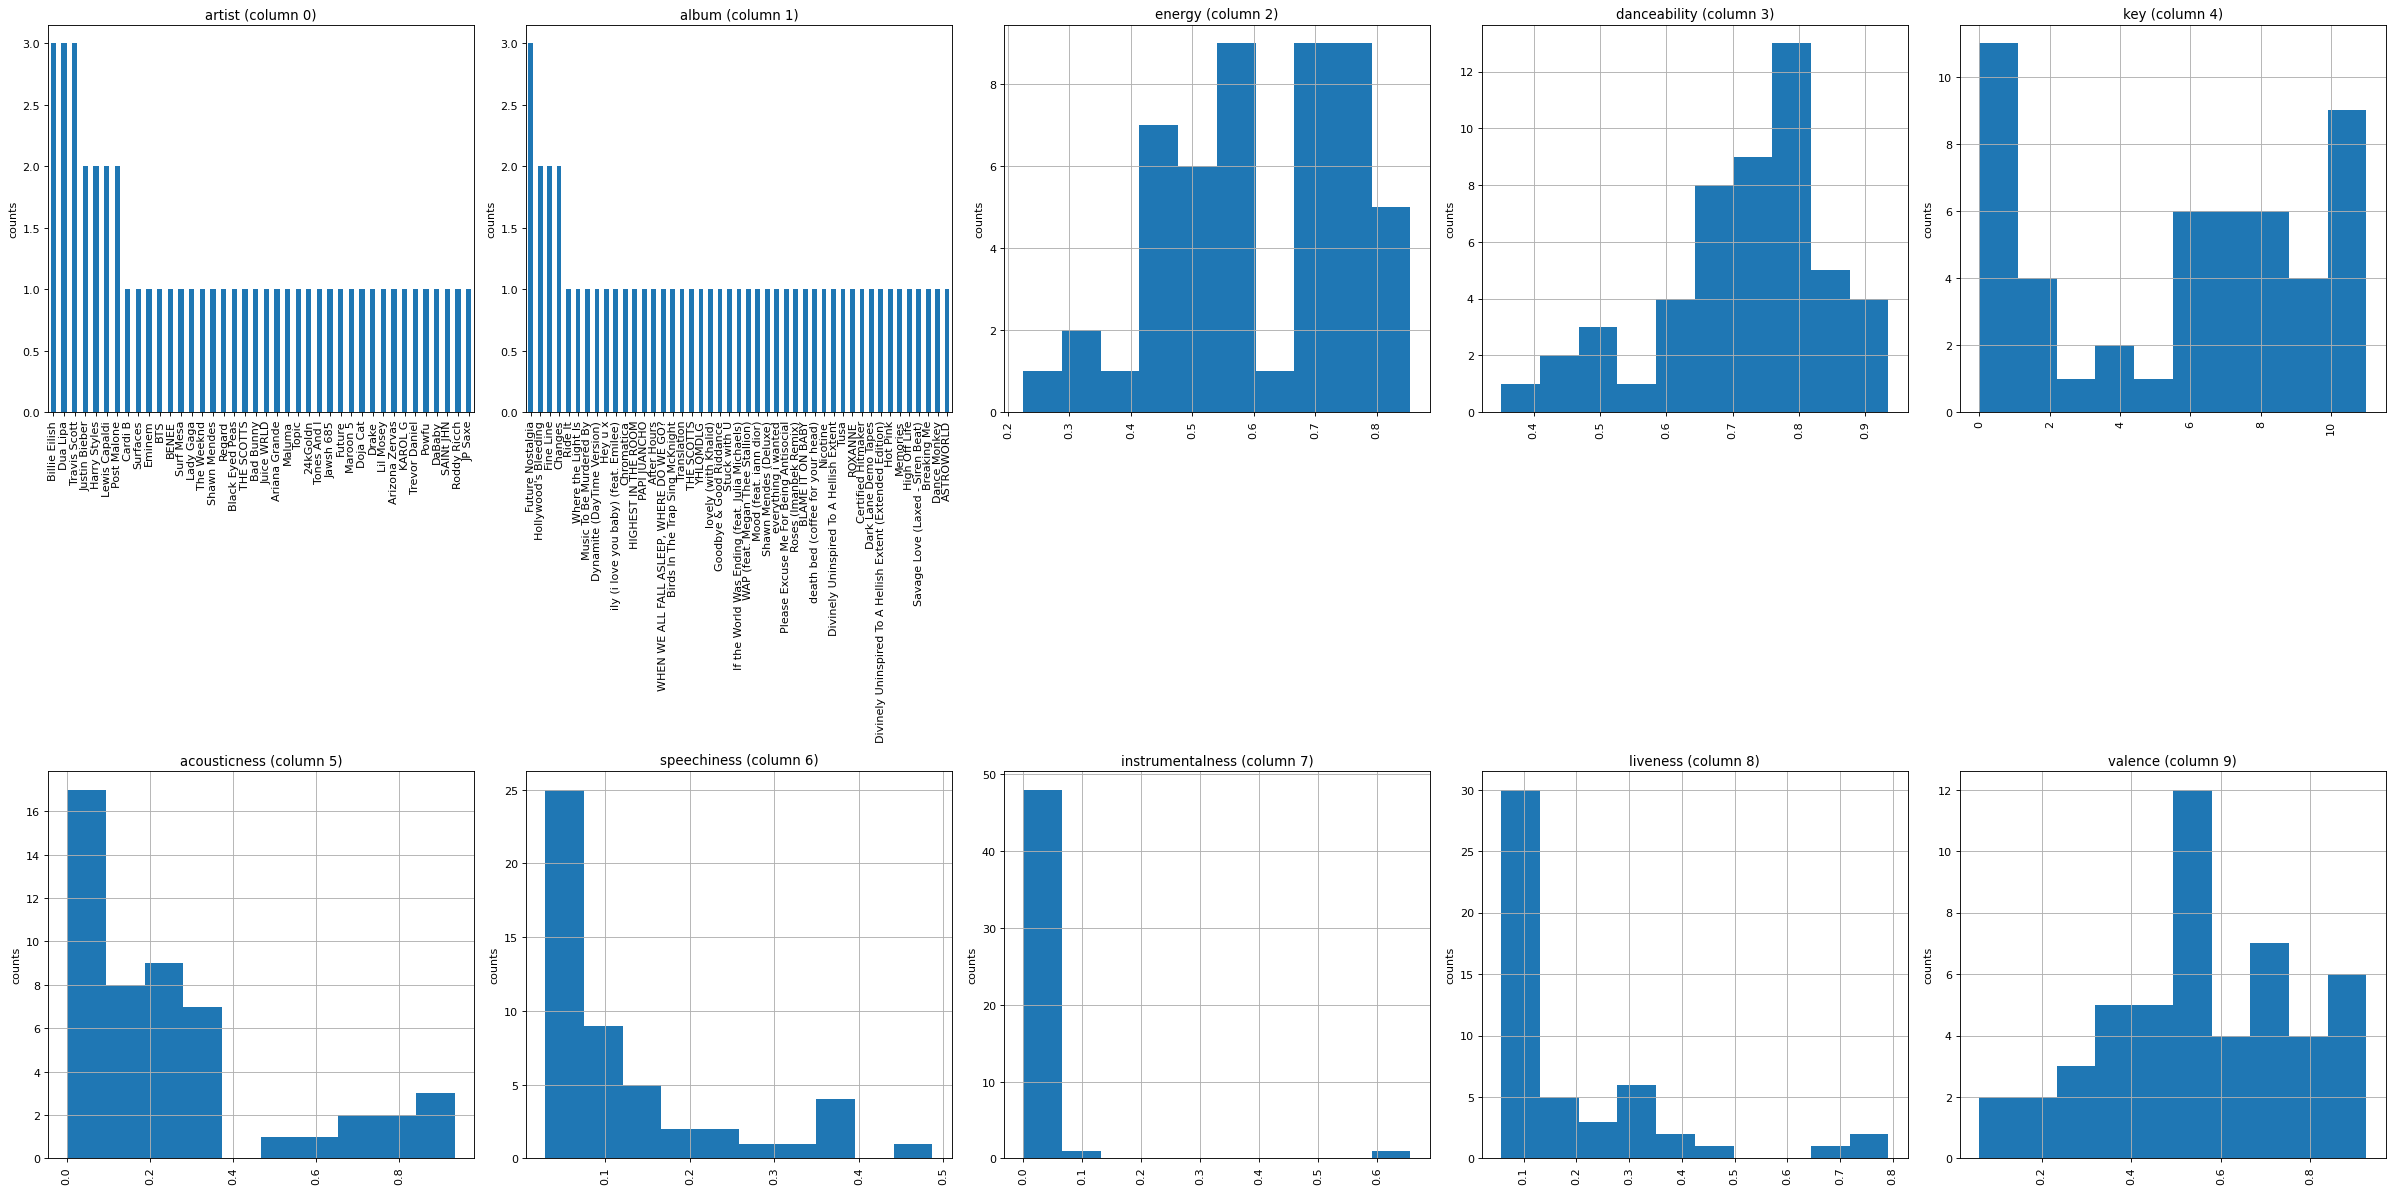

In [23]:
plotPerColumnDistribution(df1, 10, 5)

C:\Users\Hp\AppData\Local\Temp\ipykernel_40972\2342141590.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\Hp\AppData\Local\Temp\ipykernel_40972\2342141590.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


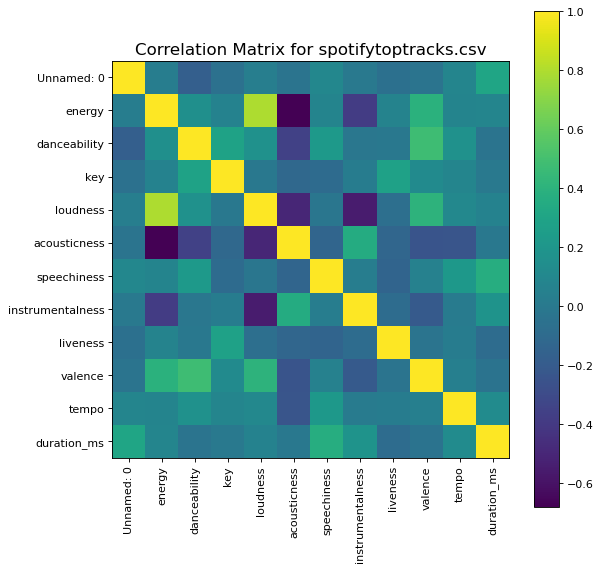

In [24]:
plotCorrelationMatrix(df1, 8)

C:\Users\Hp\AppData\Local\Temp\ipykernel_40972\2342141590.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


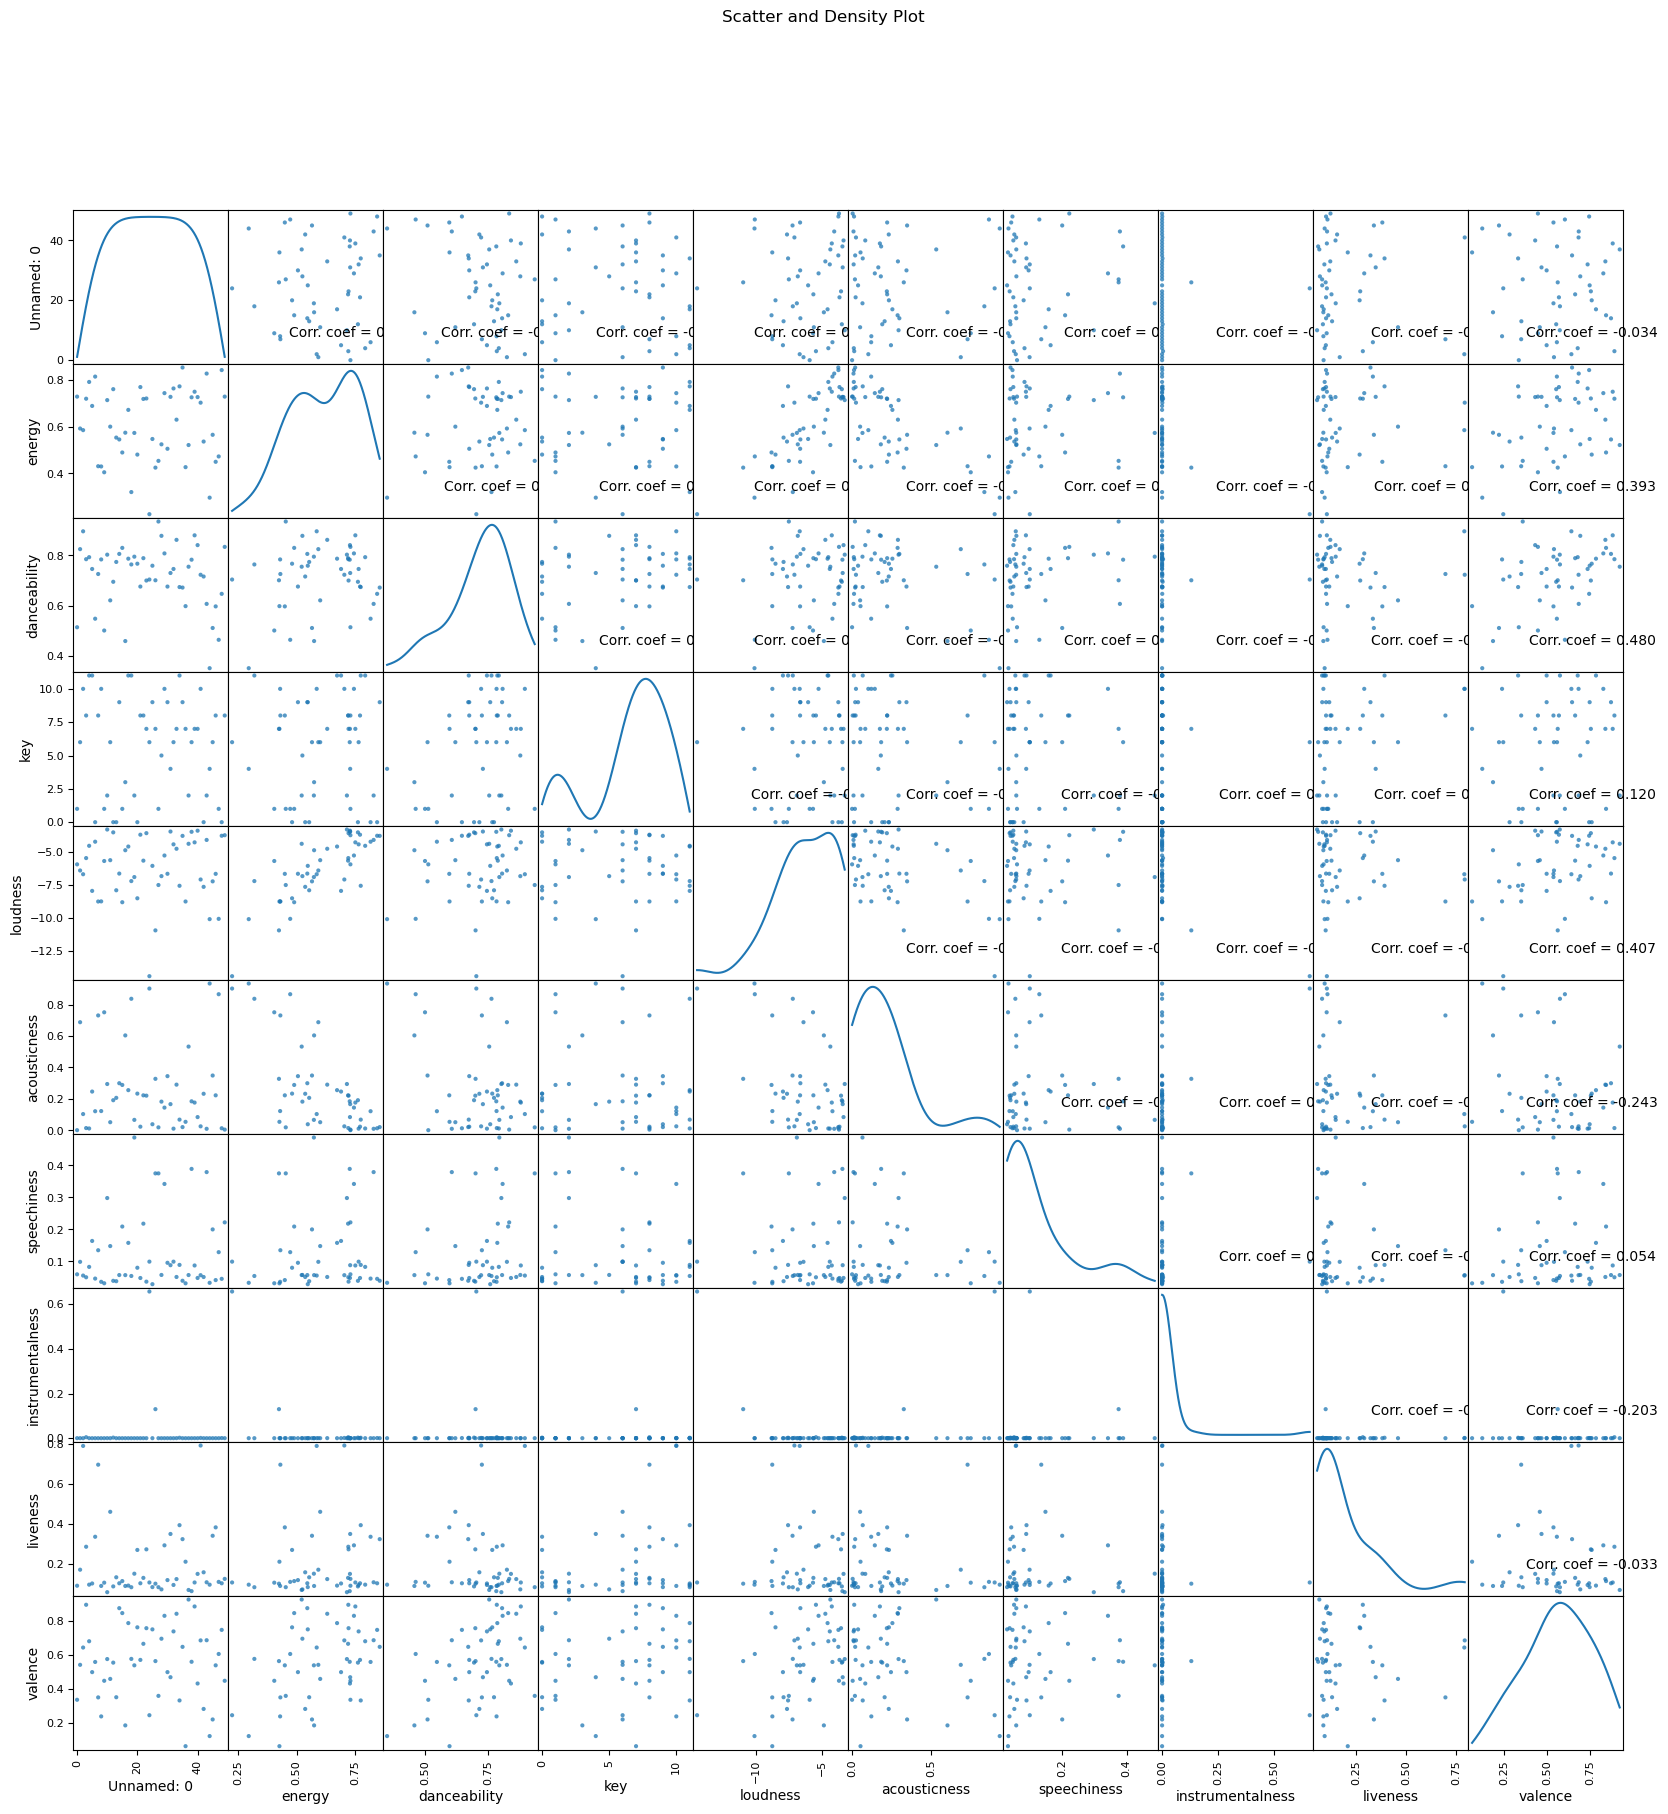

In [25]:
plotScatterMatrix(df1, 20, 10)